In [41]:
from sklearn import model_selection, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read london data and plot

df = pd.read_csv('./data/house-prices.csv',encoding='latin1',delimiter=',')
df.head()
print(f'Num Rows: {df.shape[0]}')
print(f'Num Cols: {df.shape[1]}')
print(df.columns.tolist())
print(df.dtypes.tolist())
df.head()

Num Rows: 128
Num Cols: 8
['HomeID', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']
[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O')]


,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [42]:
def SQD(v0, v1):
    return (v0-v1)**2

def nomDist(v0, v1):
    return (v0==v1) * 1

def euclidDist(X0,X1):
    dist = 0
    for i in range(len(X0)):
        if isinstance(X0.iloc[i], (int, np.integer)):
            dist+=SQD(X0.iloc[i],X1.iloc[i])
        else:
            dist+=nomDist(X0.iloc[i],X1.iloc[i])
    return np.sqrt(dist)

def absDif(v0, v1):
    return abs(v0-v1)

def manhatDist(X0,X1):
    dist = 0
    for i in range(len(X0)):
        if isinstance(X0.iloc[i], (int, np.integer)):
            dist+=absDif(X0.iloc[i],X1.iloc[i])
        else:
            dist+=nomDist(X0.iloc[i],X1.iloc[i])
    return dist



In [43]:
eucM = np.zeros((df.shape[0],df.shape[0]))
manhatM = np.zeros((df.shape[0],df.shape[0]))

dfNoHomeID = df.iloc[:,1:]
brickMap = {'Yes': 1, 'No':0}
dfNoHomeID["Brick"] = dfNoHomeID["Brick"].map(brickMap)
neighborhoodMap = {'East': 0, 'North': 90, 'West': 180, 'South': 270}
dfNoHomeID['Neighborhood'] = dfNoHomeID['Neighborhood'].map(neighborhoodMap)



for i in range(df.shape[0]):
	for j in range(df.shape[0]):
		if i != j: 
			eucM[i,j]=euclidDist(dfNoHomeID.iloc[i],dfNoHomeID.iloc[j])
			manhatM[i,j]=manhatDist(dfNoHomeID.iloc[i],dfNoHomeID.iloc[j])

print(f'Mean dist for Euclidean dist = {np.mean(eucM)}')
print(f'Max dist for Euclidean dist = {np.max(eucM)}')

print(f'Mean dist for Manhattan dist = {np.mean(manhatM)}')
print(f'Max dist for Manhattan dist = {np.max(manhatM)}')

Mean dist for Euclidean dist = 30055.83403493584
Max dist for Euclidean dist = 142102.5112585981
Mean dist for Manhattan dist = 30369.843017578125
Max dist for Manhattan dist = 143034.0


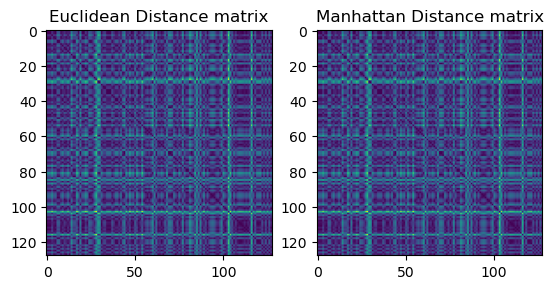

In [44]:
plt.subplot(1, 2, 1)
plt.title("Euclidean Distance matrix")
plt.imshow(eucM)
plt.subplot(1, 2, 2)
plt.title("Manhattan Distance matrix")
plt.imshow(manhatM)

In [45]:
# Find 5 nearest neighbours for a given house
house = {
    'SqFt': 2050,
    'Bedrooms': 2,
    'Bathrooms': 1,
    'Offers': 2,
    'Brick': 'No',
    'Neighborhood': 'East'
}

dfHouse = pd.DataFrame([house])
dfHouse["Brick"] = dfHouse["Brick"].map(brickMap)
dfHouse['Neighborhood'] = dfHouse['Neighborhood'].map(neighborhoodMap)

dfNoPrice = dfNoHomeID.iloc[:,1:]

eucDistToHouse = np.array([euclidDist(dfHouse.iloc[0], dfNoPrice.iloc[j]) for j in range(df.shape[0])])
manhatDistToHouse = np.array([manhatDist(dfHouse.iloc[0], dfNoPrice.iloc[j]) for j in range(df.shape[0])])

# Find the indices of the 5 nearest neighbors
eucNN = df.iloc[np.argsort(desired_euc_distances)[:5]]
manhatNN = df.iloc[np.argsort(desired_manhat_distances)[:5]]

# Compute the average price of the neighbors
eucAvgPrice = np.mean(eucNN['Price'])
manhatAvgPrice = np.mean(manhatNN['Price'])

# Print the results
print(f'Euclidean Nearest Neighbors: \n{eucNN}')
print(f'Mean Price of Euclidean Nearest Neighbors: {eucAvgPrice}')

print('\n')

print(f'Manhattan Nearest Neighbors: \n{manhatNN}')
print(f'Mean Price of Manhattan Nearest Neighbors: {manhatAvgPrice}')


Euclidean Nearest Neighbors: 
     HomeID  Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
28       29  69100  1600         2          2       3    No        North
54       55  81300  1650         3          2       3    No        North
104     105  82300  1910         3          2       4    No         East
17       18  83600  1990         3          3       4    No        North
47       48  90300  2050         3          2       6    No        North
Mean Price of Euclidean Nearest Neighbors: 81320.0


Manhattan Nearest Neighbors: 
     HomeID  Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
28       29  69100  1600         2          2       3    No        North
54       55  81300  1650         3          2       3    No        North
104     105  82300  1910         3          2       4    No         East
17       18  83600  1990         3          3       4    No        North
84       85  90500  1520         2          2       3    No        North
Mean Price 

In [46]:
# Using scikit-learn

import sklearn.neighbors as neighbors
eucNN = neighbors.NearestNeighbors(n_neighbors=5,algorithm='kd_tree',metric='euclidean')
eucNN.fit(dfNoPrice)
dist, ind = nn.kneighbors(dfHouse, return_distance=True)

manhatNN = neighbors.NearestNeighbors(n_neighbors=5,algorithm='kd_tree',metric='manhattan')
manhatNN.fit(dfNoPrice)
manDist, manInd = nn.kneighbors(dfHouse, return_distance=True)

eucNN = df.iloc[ind[0]]
manhatNN = df.iloc[manInd[0]]

# Compute the average price of the neighbors
eucAvgPrice = np.mean(eucNN['Price'])
manhatAvgPrice = np.mean(manhatNN['Price'])

# Print the results
print(f'Euclidean Nearest Neighbors: \n{eucNN}')
print(f'Mean Price of Euclidean Nearest Neighbors: {eucAvgPrice}')

print('\n')

print(f'Manhattan Nearest Neighbors: \n{manhatNN}')
print(f'Mean Price of Manhattan Nearest Neighbors: {manhatAvgPrice}')

Euclidean Nearest Neighbors: 
     HomeID   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
122     123  144800  2060         2          2       1   Yes         East
73       74  125700  2040         3          3       2    No         East
67       68  151900  2040         4          3       3    No         East
10       11  132500  2030         3          2       3   Yes         East
1         2  114200  2030         4          2       3    No         East
Mean Price of Euclidean Nearest Neighbors: 133820.0


Manhattan Nearest Neighbors: 
     HomeID   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
122     123  144800  2060         2          2       1   Yes         East
73       74  125700  2040         3          3       2    No         East
67       68  151900  2040         4          3       3    No         East
10       11  132500  2030         3          2       3   Yes         East
1         2  114200  2030         4          2       3    No         Eas

In [59]:
import sklearn.mixture as mixture
dfPriceSqft = dfNoHomeID.iloc[:,0:2]

gmm = mixture.GaussianMixture(n_components=2, covariance_type='spherical')
gmm.fit(dfPriceSqft)
print(gmm.means_)
labels = gmm.predict(dfPriceSqft)
print(labels)
print(gmm.score(dfPriceSqft))

[[111950.76812905   1917.27508284]
 [156374.17040881   2118.42540904]]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0]
-21.982538466058983
